<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_3_globalTemp/Visualizing_Time_Series_Dataset_Global_Temp_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

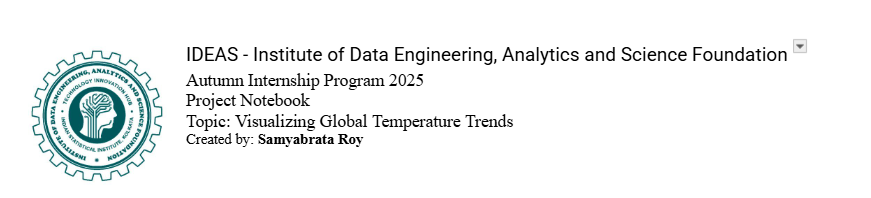

# Notebook: 3

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---




---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

#Introduction



## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:

file_id = "1cFrHScmNwQOMKFa1IRheVEuerhmGMjeE"


url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:

    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)


           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory

##Task:

What if the dataset was not available in any only repo or not hosted anywhere? How can you upload a dataset from your local machine? Code it

In [ ]:

import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

print(df.head())




Saving GlobalLandTemperaturesByMajorCity.csv to GlobalLandTemperaturesByMajorCity.csv
           dt  AverageTemperature  AverageTemperatureUncertainty     City  \
0  1849-01-01              26.704                          1.435  Abidjan   
1  1849-02-01              27.434                          1.362  Abidjan   
2  1849-03-01              28.101                          1.612  Abidjan   
3  1849-04-01              26.140                          1.387  Abidjan   
4  1849-05-01              25.427                          1.200  Abidjan   

         Country Latitude Longitude  
0  Côte D'Ivoire    5.63N     3.23W  
1  Côte D'Ivoire    5.63N     3.23W  
2  Côte D'Ivoire    5.63N     3.23W  
3  Côte D'Ivoire    5.63N     3.23W  
4  Côte D'Ivoire    5.63N     3.23W  




---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly avg temparature obtaining from 2 different sources, which will help helps us understand trends across the years.  
Are there peaks during certain months (like due to any particular season)? Let’s find out.

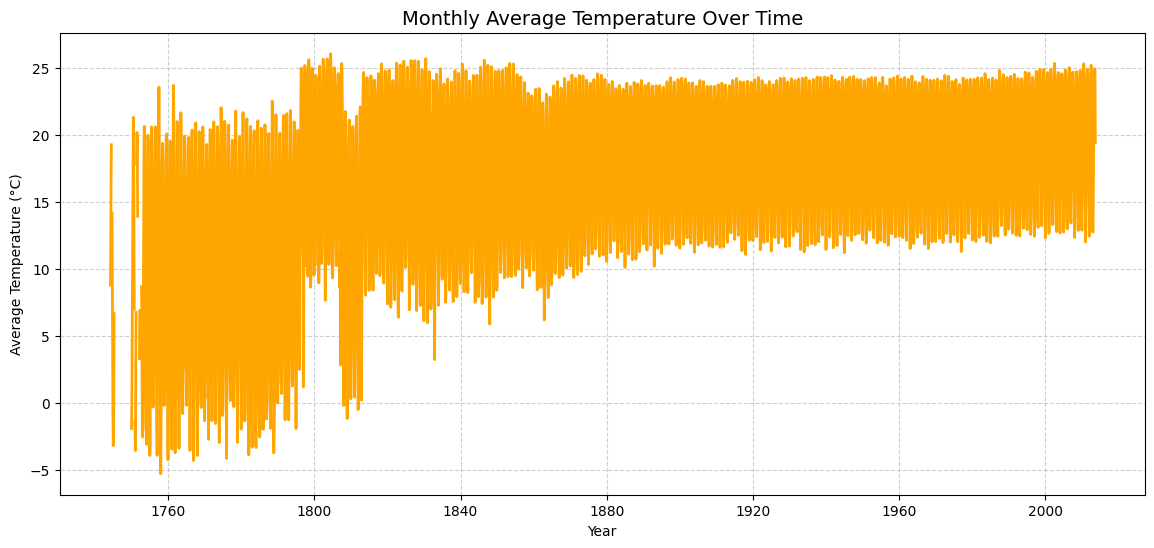

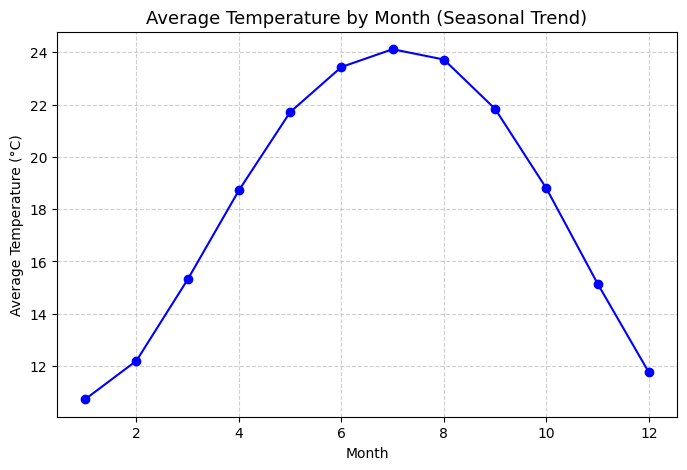

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'dt' to datetime
df_temp['dt'] = pd.to_datetime(df_temp['dt'])

# Extract year and month
df_temp['Year'] = df_temp['dt'].dt.year
df_temp['Month'] = df_temp['dt'].dt.month

#  Plot 1: Monthly Average Temperature Over Time
# Aggregate monthly average temperature for each city (you can modify 'City' or 'Country')
monthly_avg = (
    df_temp.groupby(['Year', 'Month'], as_index=False)['AverageTemperature']
    .mean()
)

# Create a datetime index for plotting
monthly_avg['Date'] = pd.to_datetime(monthly_avg['Year'].astype(str) + '-' + monthly_avg['Month'].astype(str) + '-01')

# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_avg['Date'], monthly_avg['AverageTemperature'], color='orange', linewidth=2)
plt.title("Monthly Average Temperature Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

#  Optional Seasonal Trend Plot
# Check average temperature by month (across all years)
monthly_trend = df_temp.groupby('Month', as_index=False)['AverageTemperature'].mean()

plt.figure(figsize=(8,5))
plt.plot(monthly_trend['Month'], monthly_trend['AverageTemperature'], marker='o', color='blue')
plt.title("Average Temperature by Month (Seasonal Trend)", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()




---



### Plot 2:

12 Months Moving Average

Smoothing out seasonal fluctuations and short-term variations to reveal the underlying long-term temperature trends. The 12-month moving average provides a clearer view of climate patterns by averaging each month with the 11 months surrounding it, making it easier to identify gradual warming or cooling trends over the years.

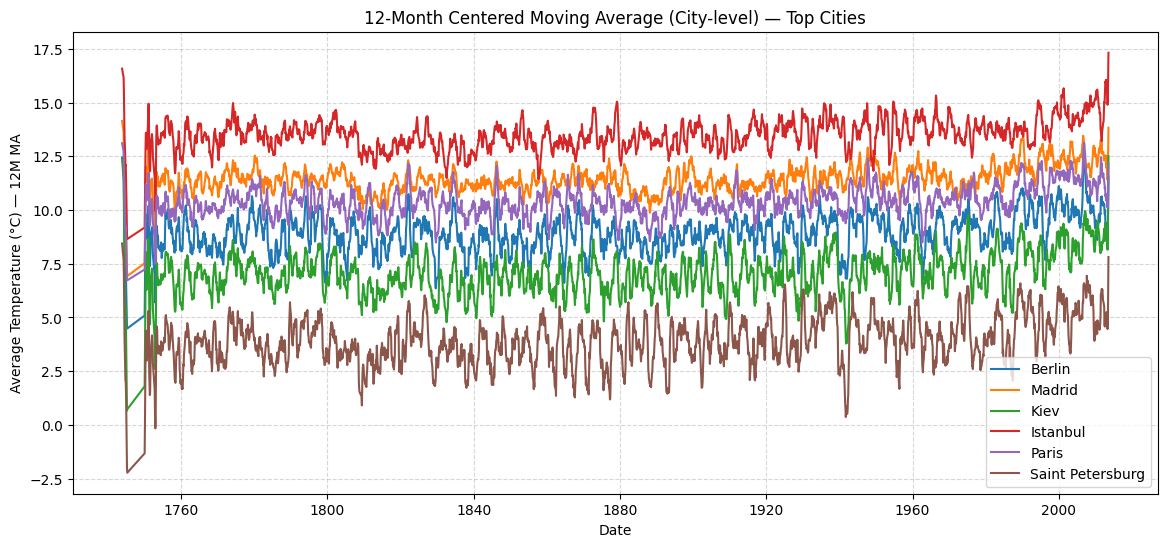

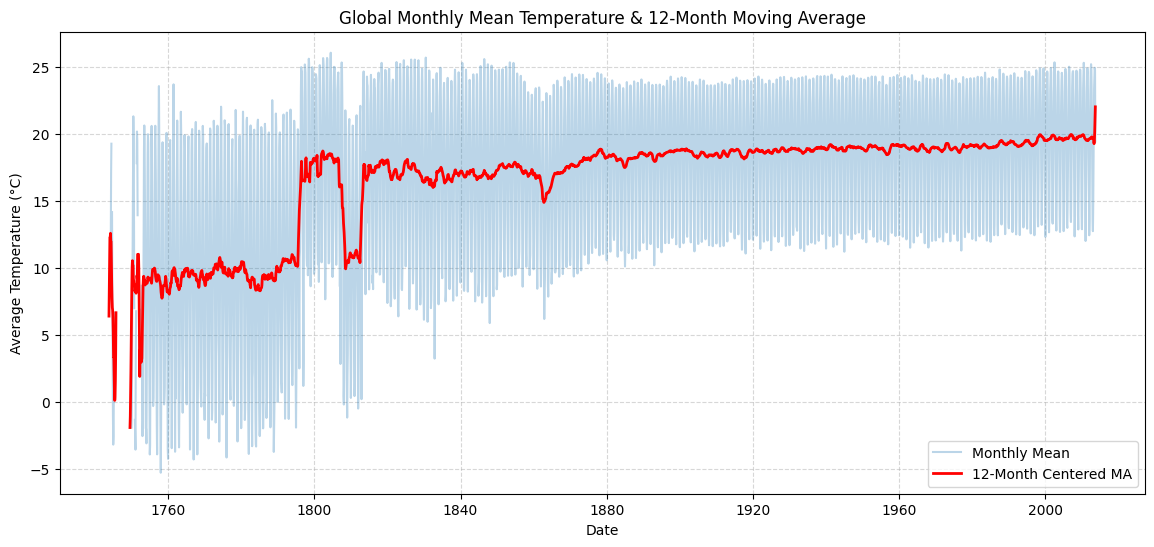

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#  1. Convert and Clean
df_temp['dt'] = pd.to_datetime(df_temp['dt'])

# Drop missing temperature values
df_temp = df_temp.dropna(subset=['AverageTemperature'])

# Sort by date (important for rolling calculation)
df_temp = df_temp.sort_values(['City', 'dt'])

# --- 2A. City-level 12-month centered moving average ---
df_temp['MA_12_city'] = (
    df_temp
    .groupby('City')['AverageTemperature']
    .transform(lambda x: x.rolling(window=12, min_periods=1, center=True).mean())
)

# Plot example for top 6 cities
cities_to_plot = df_temp['City'].value_counts().index[:6]

plt.figure(figsize=(14,6))
for city in cities_to_plot:
    sub = df_temp[df_temp['City'] == city]
    plt.plot(sub['dt'], sub['MA_12_city'], label=city)

plt.title("12-Month Centered Moving Average (City-level) — Top Cities")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C) — 12M MA")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

#  2B. Global (average across all cities) 12-month moving average
monthly_global = (
    df_temp
    .groupby(pd.Grouper(key='dt', freq='MS'))['AverageTemperature']   # monthly mean
    .mean()
    .to_frame('AverageTemperature')
)

monthly_global['MA_12_global'] = (
    monthly_global['AverageTemperature']
    .rolling(window=12, min_periods=1, center=True)
    .mean()
)

# Plot global trend
plt.figure(figsize=(14,6))
plt.plot(monthly_global.index, monthly_global['AverageTemperature'], alpha=0.3, label='Monthly Mean')
plt.plot(monthly_global.index, monthly_global['MA_12_global'], color='red', linewidth=2, label='12-Month Centered MA')

plt.title("Global Monthly Mean Temperature & 12-Month Moving Average")
plt.xlabel("Date")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Q. How would you interpet this?

Construct another line plot by taking any one of the souces in count and try to smooth-out the variation more and try to come up with a trend

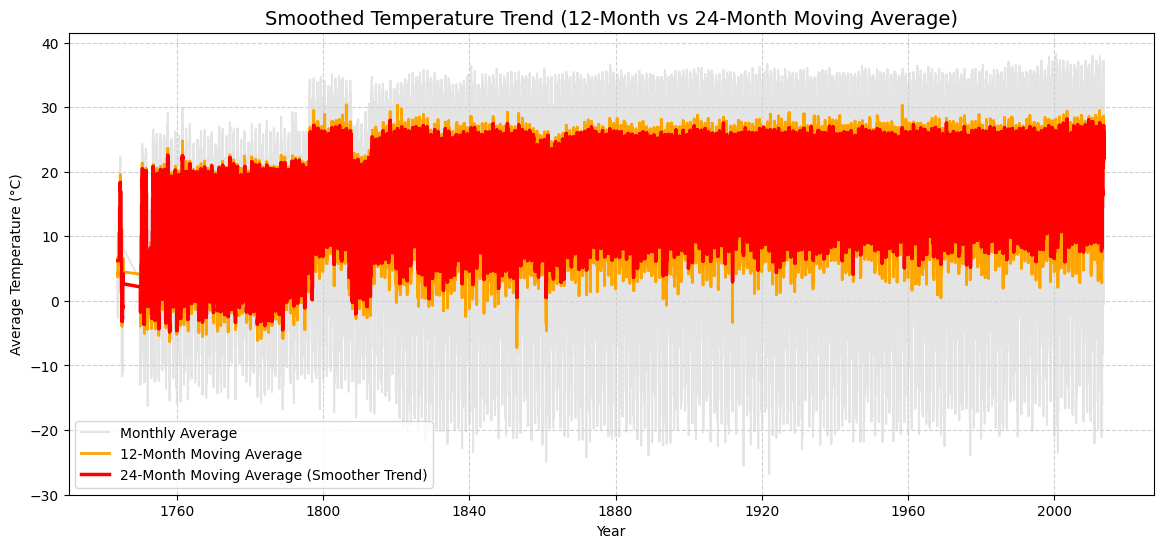

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

#  Convert and extract date features
df_temp['dt'] = pd.to_datetime(df_temp['dt'])
df_temp['Year'] = df_temp['dt'].dt.year
df_temp['Month'] = df_temp['dt'].dt.month

# Drop missing values and sort by date
df_temp = df_temp.dropna(subset=['AverageTemperature'])
df_temp = df_temp.sort_values('dt')

#  Compute 12-month moving average (centered)
df_temp['MA_12'] = df_temp['AverageTemperature'].rolling(window=12, center=True).mean()

# Compute smoother 24-month moving average
df_temp['MA_24'] = df_temp['AverageTemperature'].rolling(window=24, center=True).mean()

#  Plot both moving averages for comparison
plt.figure(figsize=(14,6))
plt.plot(df_temp['dt'], df_temp['AverageTemperature'], color='lightgray', label='Monthly Average', alpha=0.6)
plt.plot(df_temp['dt'], df_temp['MA_12'], color='orange', linewidth=2, label='12-Month Moving Average')
plt.plot(df_temp['dt'], df_temp['MA_24'], color='red', linewidth=2.5, label='24-Month Moving Average (Smoother Trend)')

#  Titles and labels
plt.title("Smoothed Temperature Trend (12-Month vs 24-Month Moving Average)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()





---


### Plot 3

Seasonal Temperature Heatmap (Last 50 Years)

A comprehensive heatmap displaying temperature variations across months and years over the past five decades. This visualization reveals seasonal patterns, climate shifts, and anomalies by showing how temperatures have changed month-by-month across different years. Warmer periods appear as lighter/warmer colors while cooler periods show as darker/cooler colors, making it easy to spot seasonal consistency, unusual weather events, and long-term climate trends.

/tmp/ipython-input-3468445033.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='AverageTemperature', data=df_last50, palette='coolwarm')


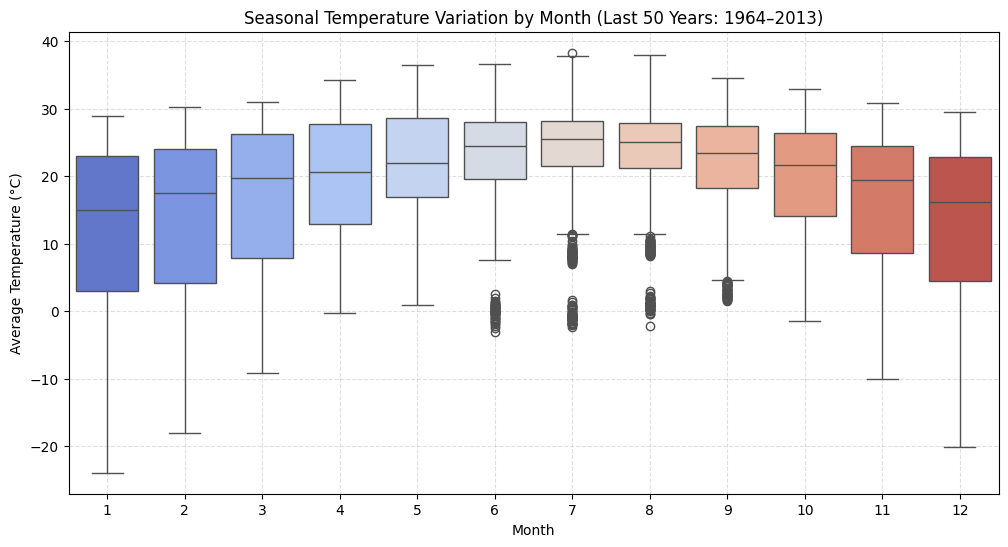

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Convert date column
df_temp['dt'] = pd.to_datetime(df_temp['dt'])

#  Extract month and year
df_temp['Year'] = df_temp['dt'].dt.year
df_temp['Month'] = df_temp['dt'].dt.month

#  Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

#  Plot monthly temperature distribution using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='AverageTemperature', data=df_last50, palette='coolwarm')

plt.title(f"Seasonal Temperature Variation by Month (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


Q. How about we try to visualize last 20 years rather? Construct the plot

/tmp/ipython-input-900232416.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='AverageTemperature', data=df_last20, palette='coolwarm')


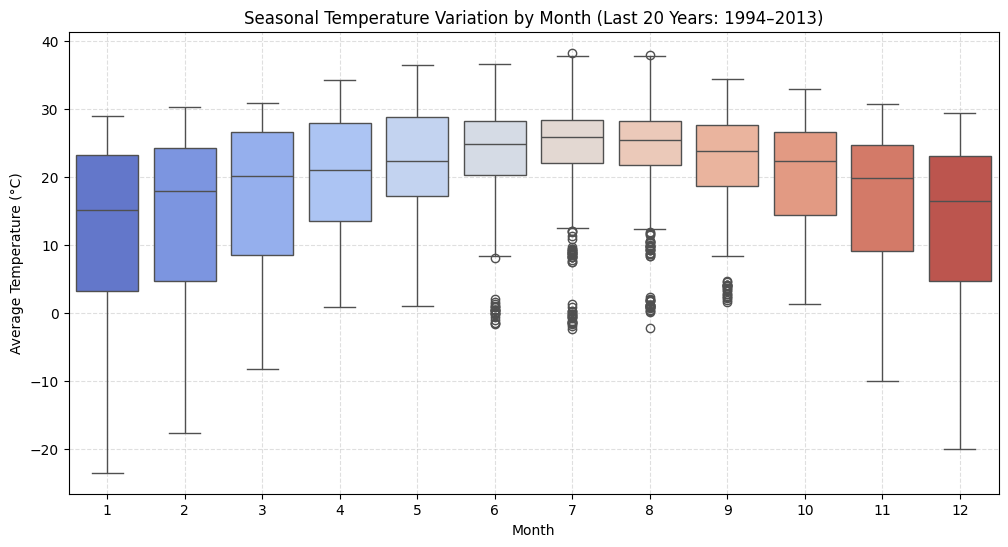

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Convert date column to datetime
df_temp['dt'] = pd.to_datetime(df_temp['dt'])

# Extract month and year
df_temp['Year'] = df_temp['dt'].dt.year
df_temp['Month'] = df_temp['dt'].dt.month

# Filter last 20 years
latest_year = df_temp['Year'].max()
df_last20 = df_temp[df_temp['Year'] >= latest_year - 19]

# Plot monthly distribution using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='AverageTemperature', data=df_last20, palette='coolwarm')

plt.title(f"Seasonal Temperature Variation by Month (Last 20 Years: {latest_year-19}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()




---

Task:

What type of charts could have served the same purpose done in plot 3? Plot any one of them (apart from heatmap) and visualize seasonal variation

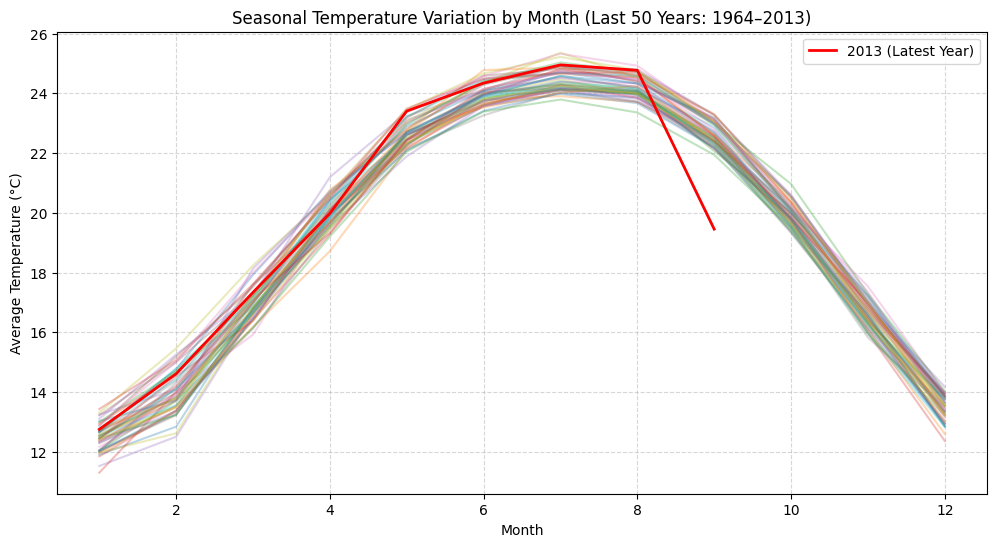

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime format
df_temp['dt'] = pd.to_datetime(df_temp['dt'])

#  Extract year and month
df_temp['Year'] = df_temp['dt'].dt.year
df_temp['Month'] = df_temp['dt'].dt.month

#  Filter last 50 years
latest_year = df_temp['Year'].max()
df_last50 = df_temp[df_temp['Year'] >= latest_year - 49]

#  Group by Year and Month, compute average temperature
seasonal_data = df_last50.groupby(['Year', 'Month'])['AverageTemperature'].mean().reset_index()

# Pivot to visualize monthly variation across years
plt.figure(figsize=(12, 6))
for year in sorted(seasonal_data['Year'].unique()):
    subset = seasonal_data[seasonal_data['Year'] == year]
    plt.plot(subset['Month'], subset['AverageTemperature'], alpha=0.3)

# Highlight the last year
latest_data = seasonal_data[seasonal_data['Year'] == latest_year]
plt.plot(latest_data['Month'], latest_data['AverageTemperature'], color='red', linewidth=2, label=f'{latest_year} (Latest Year)')

#  Labels and formatting
plt.title(f"Seasonal Temperature Variation by Month (Last 50 Years: {latest_year-49}–{latest_year})")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()




---



### Assignment:

Find a similar dataset from any public repository or constrt a synthetic data from `www.syngendata.ai` and perform similart analysis to draw inference

           dt  AverageTemperature  AverageTemperatureUncertainty Latitude  \
0  01-08-1918             26.7072                         1.4321    5.63N   
1  1850-08-01             27.4294                         1.3611    5.63N   
2  01-01-1926             28.1049                         1.6069    5.63N   
3  1859-10-01             26.1413                         1.3877    5.63N   
4  01-02-1926             25.4391                         1.2000    5.63N   

  Longitude  
0     3.23W  
1     3.23W  
2     3.23W  
3     3.23W  
4     3.23W  


/tmp/ipython-input-2684623776.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_temp[date_col] = pd.to_datetime(df_temp[date_col], dayfirst=True, infer_datetime_format=True, errors='coerce')


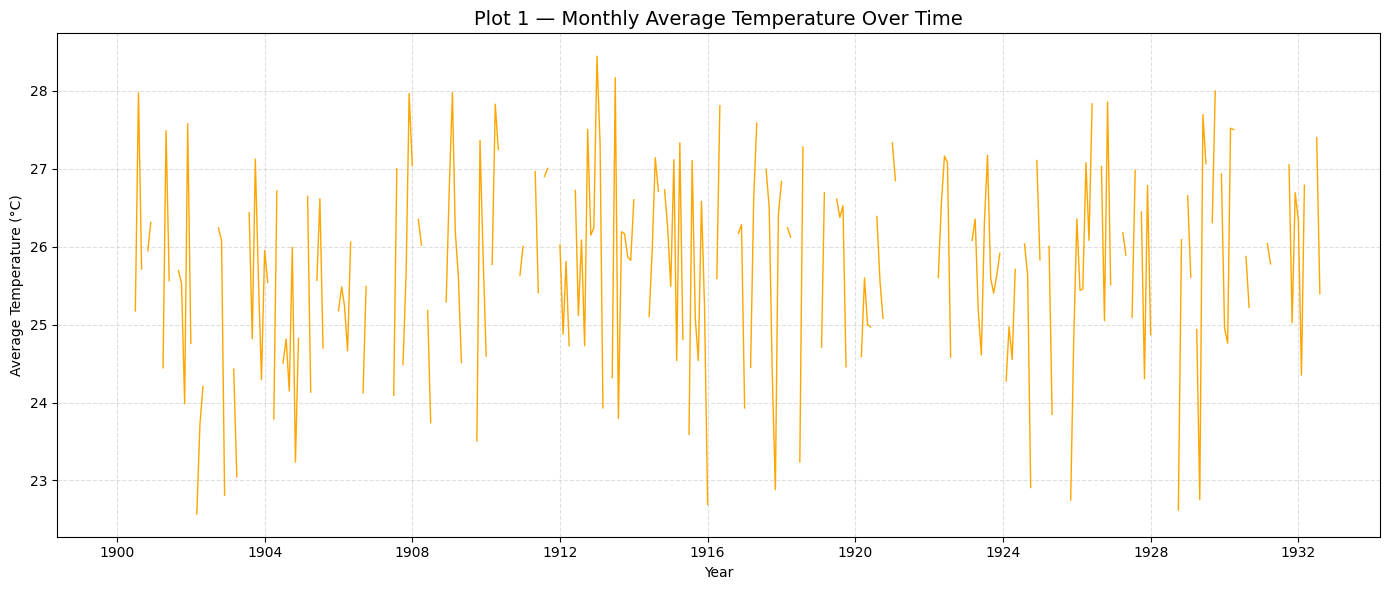

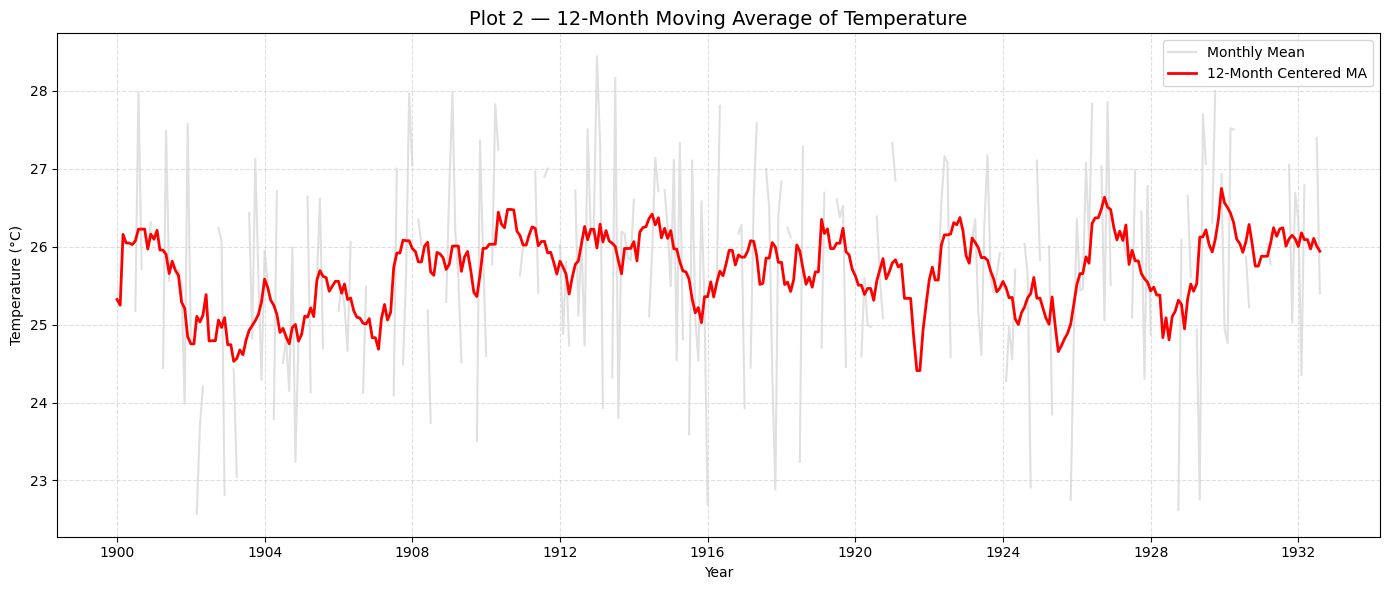

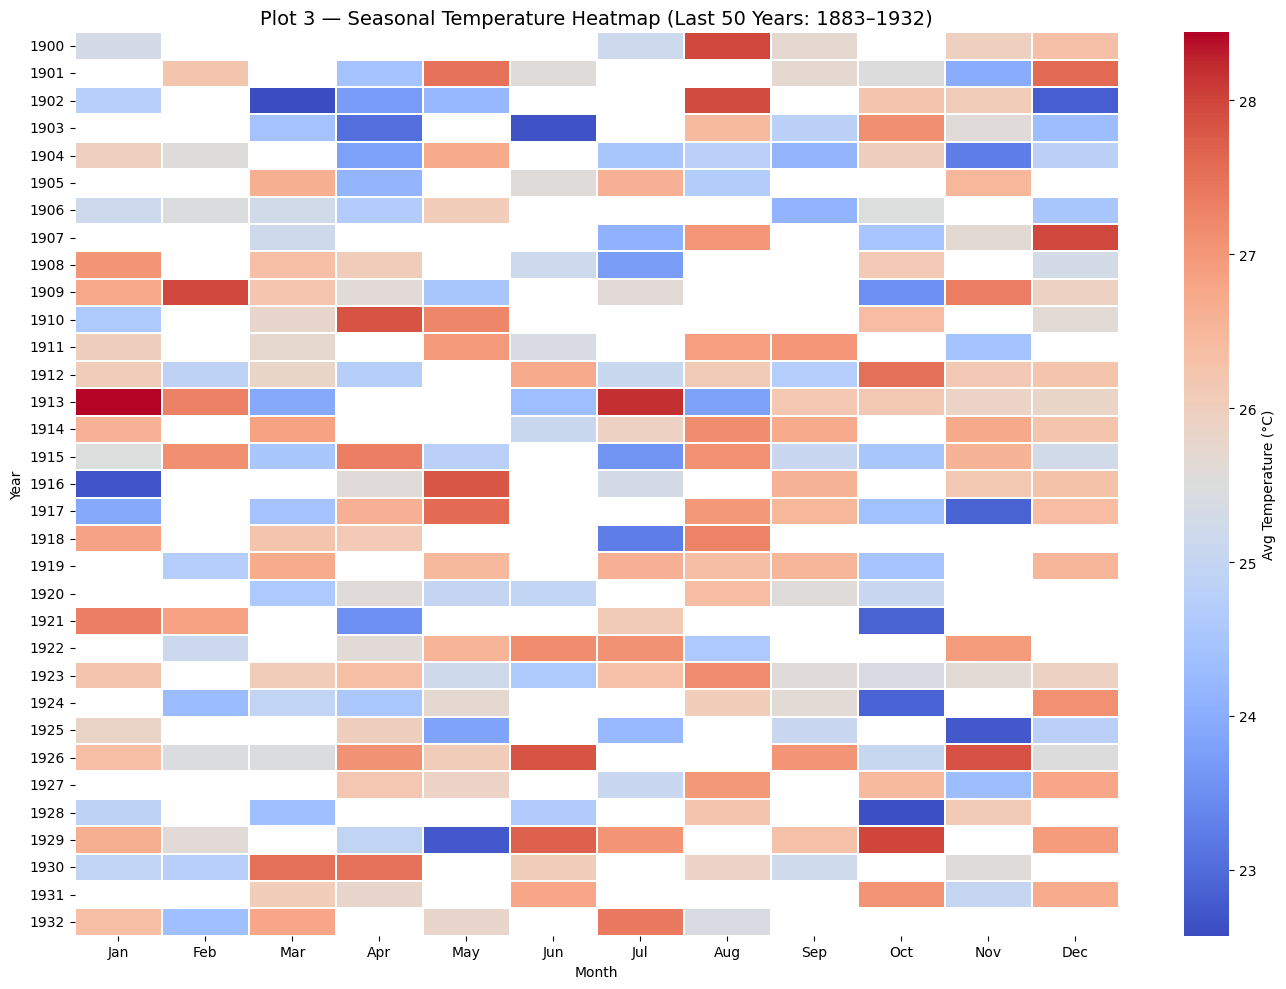


Data summary:
Date range: 1900-01-01 00:00:00 to 1932-08-01 00:00:00
Total rows after cleaning: 405
Heatmap covers years: 1883 to 1932 (50 years)


In [ ]:
#Replace with your Google Drive file ID which has public view access
file_id_1 = "1w9rsMtA6g_q-oIGUS1PdTvvG9A8hVVly"
# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id_1}"

try:
    # Read CSV directly into pandas
    df_temp = pd.read_csv(url)
    print(df_temp.head())
except Exception as e:
    print("Error loading data:", e)
#  continuation: run after your Google Drive read block

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean column names (remove leading/trailing spaces)
df_temp.columns = df_temp.columns.str.strip()

# Define the date column name (change if your column name differs)
date_col = 'dt'

# Convert to datetime (use dayfirst=True to handle day-month-year formats where applicable)
df_temp[date_col] = pd.to_datetime(df_temp[date_col], dayfirst=True, infer_datetime_format=True, errors='coerce')

# Drop rows with invalid dates or missing temperature
df_temp = df_temp.dropna(subset=[date_col, 'AverageTemperature']).copy()

# Create Year and Month numeric columns
df_temp['Year'] = df_temp[date_col].dt.year
df_temp['Month'] = df_temp[date_col].dt.month  # int 1..12
df_temp['MonthName'] = df_temp[date_col].dt.month_name()

#
# Plot 1: Monthly Average Temperature Over Time
# (global monthly mean across all cities/sources)
#
monthly_global = (
    df_temp
    .groupby(pd.Grouper(key=date_col, freq='MS'))['AverageTemperature']
    .mean()
    .reset_index()
    .rename(columns={date_col: 'Date', 'AverageTemperature': 'MonthlyMean'})
)

plt.figure(figsize=(14,6))
plt.plot(monthly_global['Date'], monthly_global['MonthlyMean'], color='orange', linewidth=1)
plt.title("Plot 1 — Monthly Average Temperature Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#
# Plot 2: 12-Month Moving Average (centered)
#
# compute centered 12-month moving average on the monthly series
monthly_global['MA_12_centered'] = monthly_global['MonthlyMean'].rolling(window=12, min_periods=1, center=True).mean()

plt.figure(figsize=(14,6))
plt.plot(monthly_global['Date'], monthly_global['MonthlyMean'], color='lightgray', alpha=0.7, label='Monthly Mean')
plt.plot(monthly_global['Date'], monthly_global['MA_12_centered'], color='red', linewidth=2, label='12-Month Centered MA')
plt.title("Plot 2 — 12-Month Moving Average of Temperature", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#
# Plot 3: Seasonal Temperature Heatmap (Last 50 Years)
#
# Decide window length (50 years). If you want 20 years, change 49 -> 19
latest_year = df_temp['Year'].max()
years_back = 49   # <- change to 19 for 20 years
start_year = latest_year - years_back

df_recent = df_temp[df_temp['Year'] >= start_year].copy()

# Group by Year & Month and compute mean temperature
seasonal_data = (
    df_recent
    .groupby(['Year', 'Month'], as_index=False)['AverageTemperature']
    .mean()
)

# Pivot to Year x Month (Month as columns)
heatmap_data = seasonal_data.pivot(index='Year', columns='Month', values='AverageTemperature')

# Reorder columns to ensure months 1..12
heatmap_data = heatmap_data.reindex(columns=range(1,13))

# Replace month numbers with abbreviated month names for display (optional)
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
heatmap_data.columns = month_labels

plt.figure(figsize=(14,10))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Avg Temperature (°C)'}, linewidths=0.3)
plt.title(f"Plot 3 — Seasonal Temperature Heatmap (Last {years_back+1} Years: {start_year}–{latest_year})", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

#
# Optional: quick diagnostics prints
#
print("\nData summary:")
print("Date range:", df_temp[date_col].min(), "to", df_temp[date_col].max())
print("Total rows after cleaning:", len(df_temp))
print(f"Heatmap covers years: {start_year} to {latest_year} ({years_back+1} years)")

